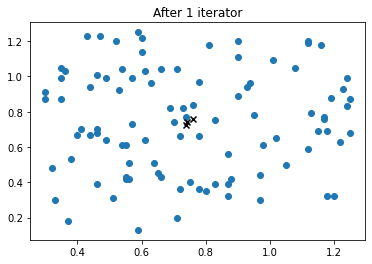

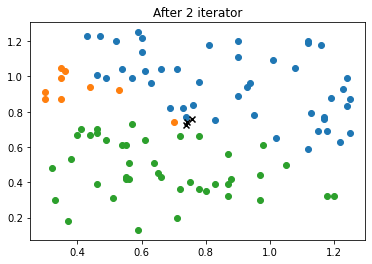

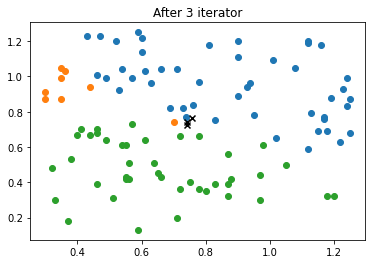

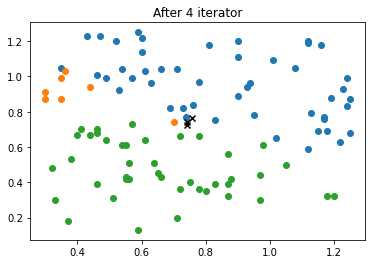

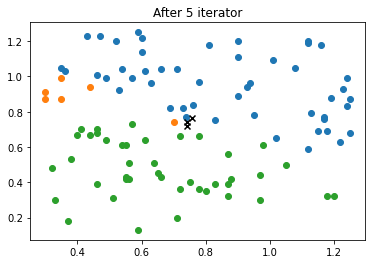

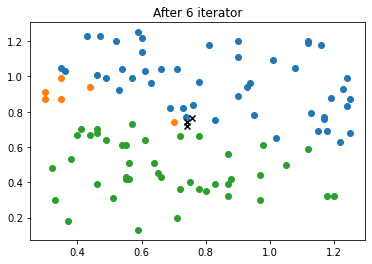

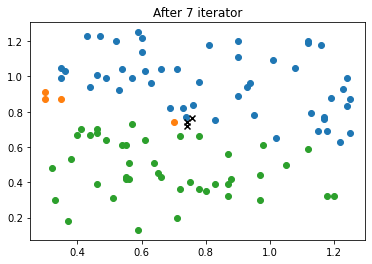

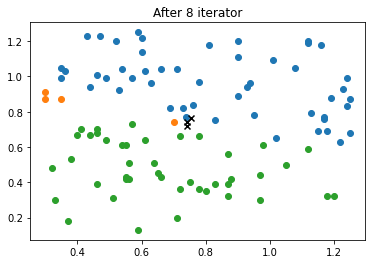

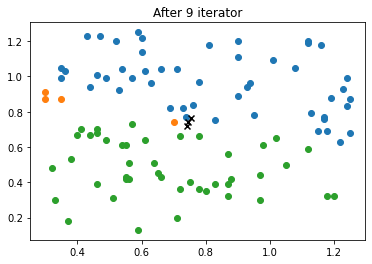

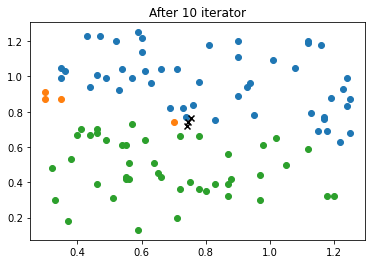

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

class FCM:
    def __init__(self, data, m, c):
        self.data = data # Ham veri
        self.c = c  # Başlangıç Kümesi
        self.it = 0 # İterasyon sayısı
        self.m = m  # Fuzzy değeri

        self.N = len(self.data) # Ham veri sayısı
        self.L = len(self.c)    # Küme sayısı
        self.n = len(self.data[0])  # Veri boyutu
        self.U = np.zeros((self.N, self.L)) 

        self.clusterIni(0)

    def clusterIni(self, sig):
        self.cluster = {}  
        for i in range(self.L):
            if i==0 and sig==0:
                self.cluster[i] = data
            else:
                self.cluster[i] = []


    def getU(self):
        # U matrisini hesaplıyoruz
        for _i,i in enumerate(self.data):
            for _k,k in enumerate(self.c):
                d = 0
                for n in range(self.n):
                    d = d + (i[n]-k[n])**2
                self.U[_i,_k] = np.power(1/d, 1/(self.m-1))
        
        # Veri noktasının ait olduğu sınıfı işartetliyoruz
        cluster = []
        for _u,u in enumerate(self.U):
            s = np.sum(u)
            for _l in range(self.L):
               self.U[_u,_l] = self.U[_u,_l]/s

            cluster.append(np.argmax(u))
        
        # Küme verilerini kaydediyoruz
        self.clusterIni(1)
        for ind,dat in enumerate(self.data):
            self.cluster[cluster[ind]].append(dat)


    def getC(self):
        # Küme merkezini yeniden hesaplıyoruz
        c = []
        for l in range(self.L):
            s1 = []
            for n in range(self.n):
                s1.append(0)
            s2 = 0
            for _i,i in enumerate(self.data):
                u = self.U[_i,l]
                for n in range(self.n):
                    s1[n] = s1[n] + np.power(u, self.m) * i[n]
                s2 = s2 + np.power(u, self.m)
            l = []
            for n in range(self.n):
                l.append(s1[n]/s2)
            c.append(l)

        if self.c == c:
            return 0
        else:
            self.c = c
            return 1

    # İterasyon
    def iter(self, it):
        for i in range(it):
            self.getU()
            b = self.getC()
            self.it = self.it + 1
            self.plot(1)
            if not b:
                print("Total iteration %d times"%(self.it-1))
                break

    def plot(self, isSave = 0):
        # Kümeleri gösteriyoruz
        for c in self.cluster:
            if(self.cluster[c] == []):
                continue
            x = np.array(self.cluster[c])[:,0]
            y = np.array(self.cluster[c])[:,1]
            plt.scatter(x, y)

        # Merkez noktalarını gösteriyoruz
        mx = np.array(self.c)[:,0]
        my = np.array(self.c)[:,1]
        plt.scatter(mx, my, marker='x', color='black')

        plt.title("After %d iterator"%self.it)
        if isSave:
            plt.savefig("./FCM/%d.png"%self.it)
        plt.show()


if __name__ == '__main__':
    
    f = open('./clusterData.txt', 'r')
    data = []
    for _d in f:
        dat = _d.rstrip().split(' ')
        data.append([float(dat[0]), float(dat[1])])
    f.close()
    c = [[3,3],[6,5],[10,1]]

    # FCM
    obj = FCM(data, 500 , c)
    obj.iter(10)

    
    inp = []
    for i in range(obj.it):
        inp.append(imageio.imread('./FCM/%d.png'%(i+1)))
    outp = './FCM/fcm.gif'
    imageio.mimsave(outp, inp, duration=1)